# Tucil 1 - IF3270 Machine Learning

Authors:

- Josep Marcello / 13519164 / K3
- Jeremia Axel / 13519188 / K4

# Load (some) Libraries

In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [2]:
## UTILITY FUNCTIONS AND METHODS
graphviz.set_jupyter_format('png')

DEBUG = False
def evaluate(prediction, true_label, debug=False):
    '''
    assume: list is at the same order
    prediction: list of predicted values
    true: list of actual values
    '''
    if debug:
        print(prediction)
        print(true_label)
        print("Diff:")
        diff_counter = 0
        n_item = max(len(prediction), len(true_label))
        for i in range(n_item):
            if prediction[i] != true_label[i]:
                print("Index-{i}: {item1} <> {item2}".format(i=i, item1=prediction[i], item2=true_label[i]))
                diff_counter += 1                
        print(f"Differences: {diff_counter}")
        print(classification_report(true_label, prediction, zero_division=1))

    accuracy = accuracy_score(true_label, prediction)
    f1 = f1_score(true_label, prediction)
    print(f"Accuracy: {accuracy}\nF1 score: {f1}")

    return accuracy, f1
    
def print_play_tennis_label_encodings(name=None):
    if name is None:
        for name in play_tennis_enc_dict:
            print(name)
            print(play_tennis_enc_dict[name])
            print()
    else:
            print(name)
            print(play_tennis_enc_dict[name])
            print()

# Load Datasets

In [3]:
play_tennis_dataset = pd.read_csv('./datasets/play_tennis.csv', dtype='category')
# Dropp 'day' column from dataset
play_tennis_dataset = play_tennis_dataset.drop(columns='day')
breast_cancer_dataset = load_breast_cancer(as_frame=True)['frame']
(play_tennis_dataset.columns, breast_cancer_dataset.columns)

(Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object'),
 Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension',
        'target'],
       dtype='object'))

## Encode Labels of Play Tennis Dataset

In [4]:
from tabulate import tabulate

le = LabelEncoder()
play_tennis_enc_dict = {}

for col_name, col_data in play_tennis_dataset.iteritems():
    le.fit(col_data)
    enc = le.transform(col_data)
    play_tennis_dataset[col_name] = le.transform(col_data)
    labels = [[class_, le.transform([class_])[0]] for class_ in le.classes_]
    play_tennis_enc_dict[col_name] = tabulate(labels, headers=['real', 'encoded'], tablefmt='pretty')

play_tennis_dataset.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


Label encoding mapping

In [5]:
print_play_tennis_label_encodings()

outlook
+----------+---------+
|   real   | encoded |
+----------+---------+
| Overcast |    0    |
|   Rain   |    1    |
|  Sunny   |    2    |
+----------+---------+

temp
+------+---------+
| real | encoded |
+------+---------+
| Cool |    0    |
| Hot  |    1    |
| Mild |    2    |
+------+---------+

humidity
+--------+---------+
|  real  | encoded |
+--------+---------+
|  High  |    0    |
| Normal |    1    |
+--------+---------+

wind
+--------+---------+
|  real  | encoded |
+--------+---------+
| Strong |    0    |
|  Weak  |    1    |
+--------+---------+

play
+------+---------+
| real | encoded |
+------+---------+
|  No  |    0    |
| Yes  |    1    |
+------+---------+



## Split Test and Train Data

In [6]:
play_tennis_train, play_tennis_test = train_test_split(play_tennis_dataset, test_size=0.2)
play_tennis_train_data, play_tennis_train_label = play_tennis_train.iloc[:, :-1], play_tennis_train.iloc[:, [-1]]['play']
play_tennis_test_data, play_tennis_test_label = play_tennis_test.iloc[:, :-1], play_tennis_test.iloc[:, [-1]]['play']
if (DEBUG):
    print("Train data:\n {data}\nTrain label:\n{label}".format(data=play_tennis_train_data, label=play_tennis_train_label))
    print("Test data:\n {data}\nTest label:\n{label}".format(data=play_tennis_test_data, label=play_tennis_test_label))

In [7]:
breast_cancer_train, breast_cancer_test = train_test_split(breast_cancer_dataset, test_size=0.2)
breast_cancer_train_data, breast_cancer_train_label = breast_cancer_train.iloc[:, :-1], breast_cancer_train.iloc[:, [-1]]['target']
breast_cancer_test_data, breast_cancer_test_label = breast_cancer_test.iloc[:, :-1], breast_cancer_test.iloc[:, [-1]]['target']
if (DEBUG):
    print("Train data:\n {data}\nTrain label:\n{label}".format(data=breast_cancer_train_data, label=breast_cancer_train_label))
    print("Test data:\n {data}\nTest label:\n{label}".format(data=breast_cancer_test_data, label=breast_cancer_test_label))

In [8]:
play_tennis_train.shape, play_tennis_test.shape

((11, 5), (3, 5))

In [9]:
breast_cancer_train.shape, breast_cancer_test.shape

((455, 31), (114, 31))

# Learning

## Decision Tree Classifier

In [10]:
from sklearn import tree

### Breast Cancer

#### Fit

In [11]:
tree_breast_cancer = tree.DecisionTreeClassifier()
tree_breast_cancer.fit(breast_cancer_train_data, breast_cancer_train_label)

DecisionTreeClassifier()

#### Model

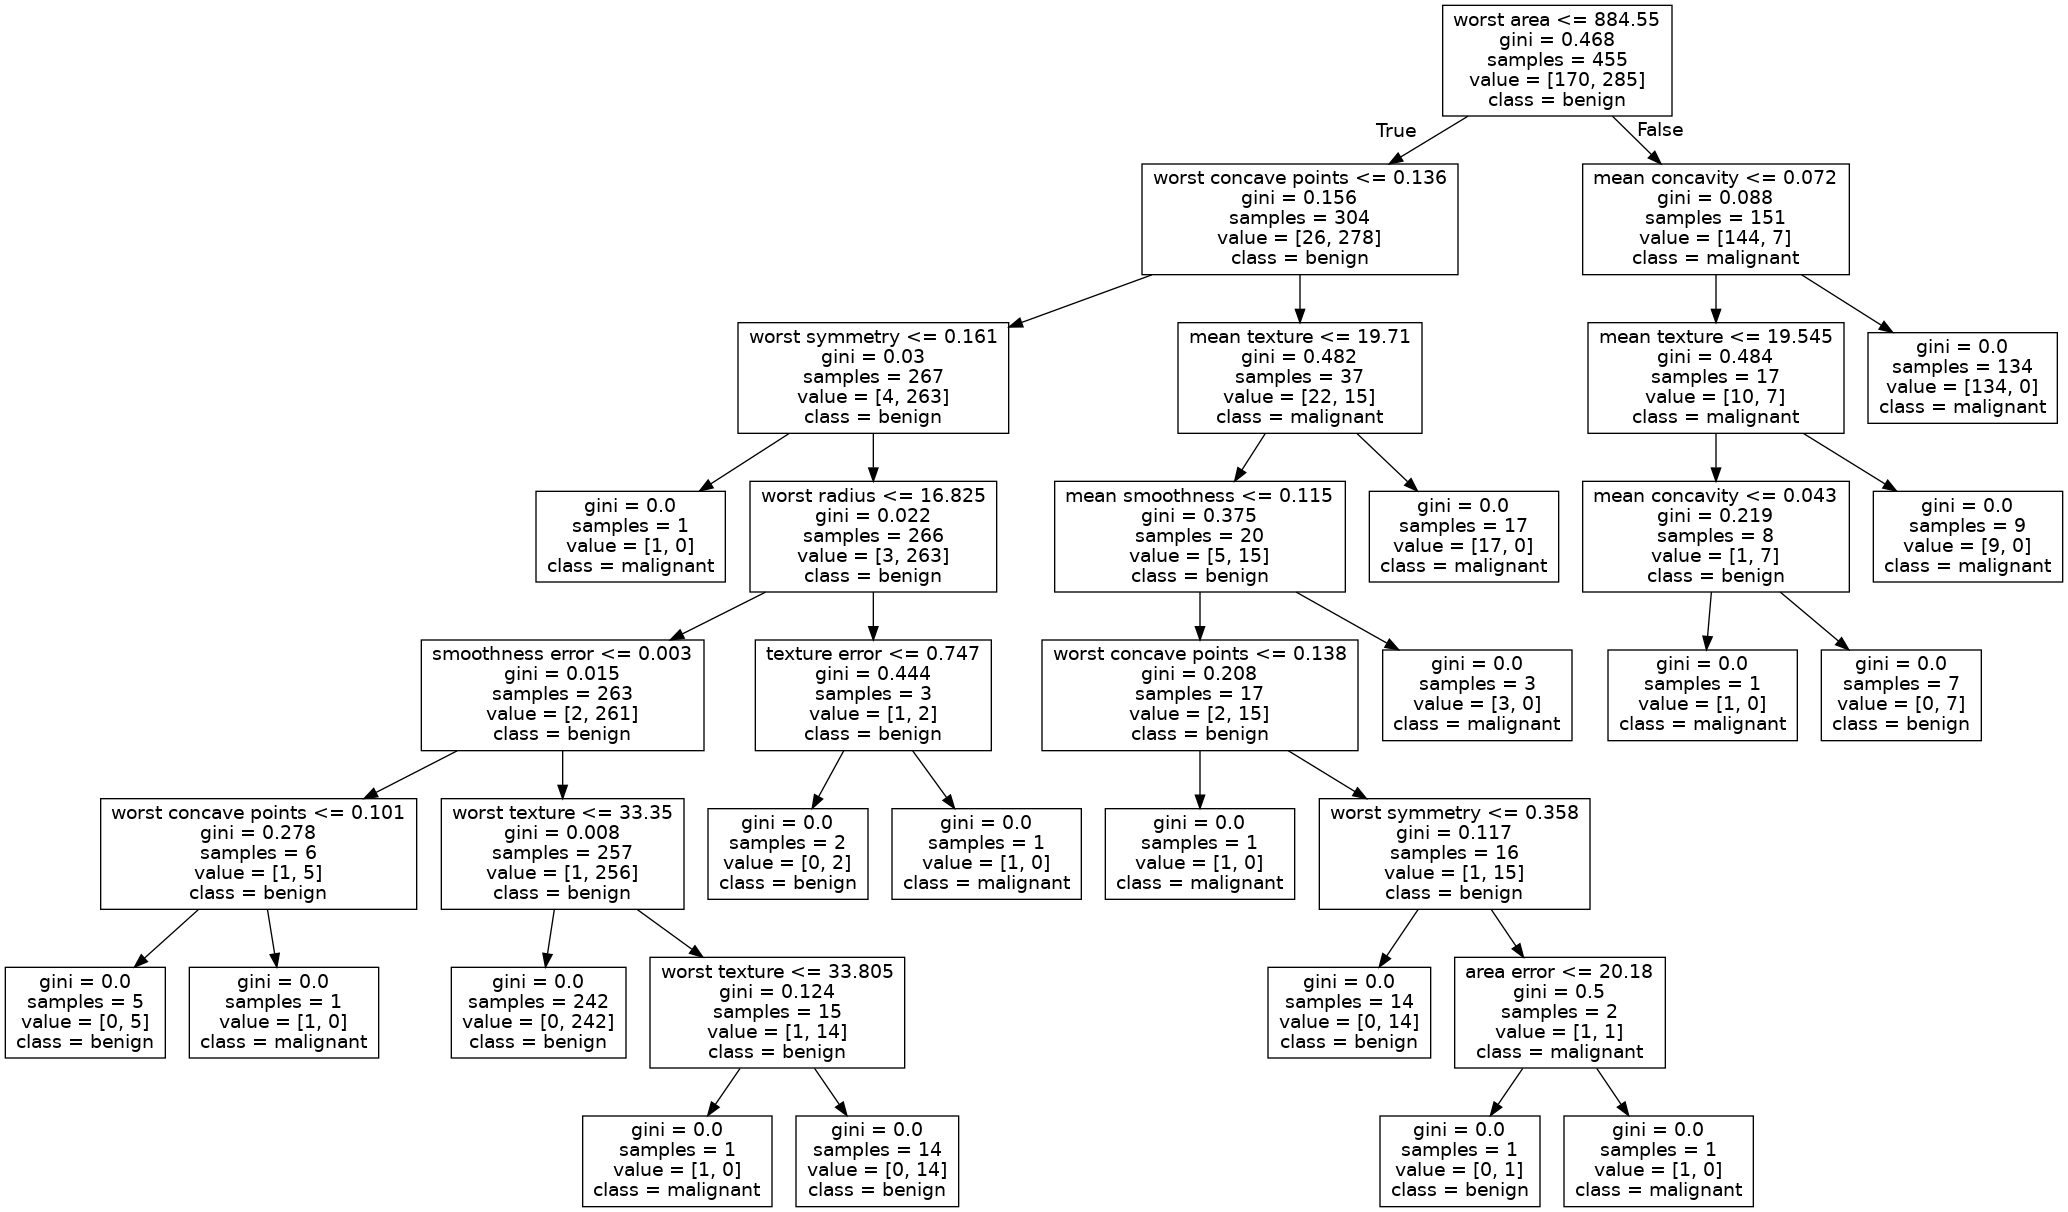

In [12]:
breast_cancer_tree_graph_src = tree.export_graphviz(tree_breast_cancer, out_file=None, feature_names=breast_cancer_train_data.columns, class_names=['malignant', 'benign'])
breast_cancer_tree_graph = graphviz.Source(breast_cancer_tree_graph_src)
breast_cancer_tree_graph

#### Predict

In [13]:
tree_breast_cancer_prediction = tree_breast_cancer.predict(breast_cancer_test_data)
tree_breast_cancer_results = evaluate(list(tree_breast_cancer_prediction), list(breast_cancer_test_label), DEBUG)

Accuracy: 0.9298245614035088
F1 score: 0.9444444444444444


### Play Tennis

#### Fit

In [14]:
tree_play_tennis = tree.DecisionTreeClassifier()
tree_play_tennis.fit(play_tennis_train_data, play_tennis_train_label)

DecisionTreeClassifier()

#### Model

outlook
+----------+---------+
|   real   | encoded |
+----------+---------+
| Overcast |    0    |
|   Rain   |    1    |
|  Sunny   |    2    |
+----------+---------+

temp
+------+---------+
| real | encoded |
+------+---------+
| Cool |    0    |
| Hot  |    1    |
| Mild |    2    |
+------+---------+

humidity
+--------+---------+
|  real  | encoded |
+--------+---------+
|  High  |    0    |
| Normal |    1    |
+--------+---------+

wind
+--------+---------+
|  real  | encoded |
+--------+---------+
| Strong |    0    |
|  Weak  |    1    |
+--------+---------+

play
+------+---------+
| real | encoded |
+------+---------+
|  No  |    0    |
| Yes  |    1    |
+------+---------+



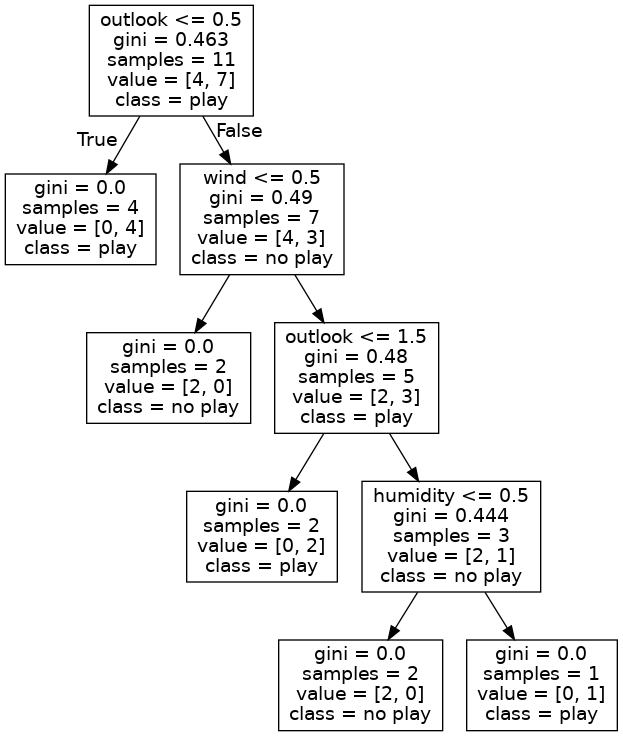

In [15]:
play_tennis_tree_graph_src = tree.export_graphviz(tree_play_tennis, out_file=None, feature_names=play_tennis_train_data.columns, class_names=['no play', 'play'])
play_tennis_tree_graph = graphviz.Source(play_tennis_tree_graph_src)
print_play_tennis_label_encodings()
play_tennis_tree_graph

#### Predict

In [16]:
tree_play_tennis_prediction = tree_play_tennis.predict(play_tennis_test_data)
tree_play_tennis_results = evaluate(list(tree_play_tennis_prediction), list(play_tennis_test_label), DEBUG)

Accuracy: 0.6666666666666666
F1 score: 0.6666666666666666


## ID3 Estimator

In [17]:
# Workaround for error: cannot import name 'six' from 'sklearn.externals', source: https://stackoverflow.com/a/62354885
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator, export_graphviz as id3_export_graphviz, export_text

### Breast Cancer

#### Fit

In [18]:
id3_breast_cancer = Id3Estimator()
id3_breast_cancer.fit(breast_cancer_train_data, np.ravel(breast_cancer_train_label))

Id3Estimator()

#### Model

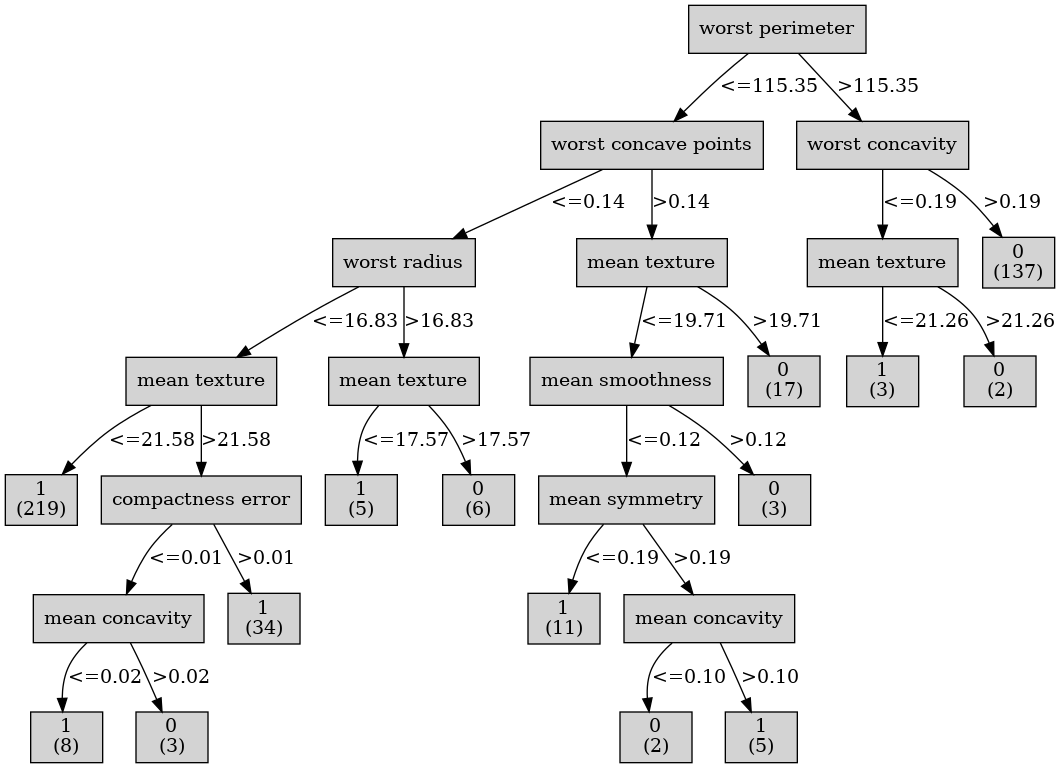

In [19]:
id3_export_graphviz(id3_breast_cancer.tree_, './graphs/id3/breast_cancer.odt', breast_cancer_train_data.columns)
with open('./graphs/id3/breast_cancer.odt', 'r') as f:
    breast_cancer_id3_graph_src = f.read()
breast_cancer_id3_graph = graphviz.Source(breast_cancer_id3_graph_src)
breast_cancer_id3_graph

#### Predict

In [20]:
id3_breast_cancer_prediction = id3_breast_cancer.predict(breast_cancer_test_data)
id3_breast_cancer_results = evaluate(list(id3_breast_cancer_prediction), list(breast_cancer_test_label), DEBUG)

Accuracy: 0.9035087719298246
F1 score: 0.9230769230769231


### Play Tennis

#### Fit

In [21]:
id3_play_tennis = Id3Estimator()
id3_play_tennis.fit(play_tennis_train_data, np.ravel(play_tennis_train_label))

Id3Estimator()

#### Model

outlook
+----------+---------+
|   real   | encoded |
+----------+---------+
| Overcast |    0    |
|   Rain   |    1    |
|  Sunny   |    2    |
+----------+---------+

temp
+------+---------+
| real | encoded |
+------+---------+
| Cool |    0    |
| Hot  |    1    |
| Mild |    2    |
+------+---------+

humidity
+--------+---------+
|  real  | encoded |
+--------+---------+
|  High  |    0    |
| Normal |    1    |
+--------+---------+

wind
+--------+---------+
|  real  | encoded |
+--------+---------+
| Strong |    0    |
|  Weak  |    1    |
+--------+---------+

play
+------+---------+
| real | encoded |
+------+---------+
|  No  |    0    |
| Yes  |    1    |
+------+---------+



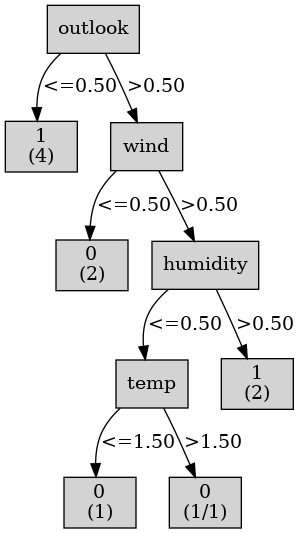

In [22]:
play_tennis_id3_graph_src = id3_export_graphviz(id3_play_tennis.tree_, './graphs/id3/play_tennis.odt', play_tennis_train_data.columns)
with open('./graphs/id3/play_tennis.odt', 'r') as f:
    play_tennis_id3_graph_src = f.read()
play_tennis_id3_graph = graphviz.Source(play_tennis_id3_graph_src)
print_play_tennis_label_encodings()
play_tennis_id3_graph

#### Predict

In [23]:
id3_play_tennis_prediction = id3_play_tennis.predict(play_tennis_test_data)
id3_play_tennis_results = evaluate(list(id3_play_tennis_prediction), list(play_tennis_test_label), DEBUG)

Accuracy: 0.6666666666666666
F1 score: 0.6666666666666666


## K-Means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [24]:
from sklearn.cluster import KMeans

### Breast Cancer

#### Fit

In [25]:
kmeans_breast_cancer = KMeans(n_clusters=2, random_state=69420, init='random', n_init=1000)
kmeans_breast_cancer.fit(breast_cancer_train_data)

KMeans(init='random', n_clusters=2, n_init=1000, random_state=69420)

#### Model

In [26]:
kmeans_breast_cancer_centroids = kmeans_breast_cancer.cluster_centers_
kmeans_breast_cancer_table_header = ['col name', 'centroid 1', 'centroid 2']
kmeans_breast_cancer_table_rows = []
for i in range(len(breast_cancer_train_data.columns)):
    kmeans_breast_cancer_table_rows.append([breast_cancer_train_data.columns[i], kmeans_breast_cancer_centroids[0][i], kmeans_breast_cancer_centroids[1][i]])
print(tabulate(kmeans_breast_cancer_table_rows, headers=kmeans_breast_cancer_table_header, tablefmt="pretty"))

+-------------------------+-----------------------+----------------------+
|        col name         |      centroid 1       |      centroid 2      |
+-------------------------+-----------------------+----------------------+
|       mean radius       |   19.35588785046729   |  12.546313218390804  |
|      mean texture       |  21.700934579439252   |  18.668390804597703  |
|     mean perimeter      |  128.04579439252336   |  81.04612068965518   |
|        mean area        |  1184.7214953271032   |  496.01896551724116  |
|     mean smoothness     |  0.1009177570093458   | 0.09467844827586207  |
|    mean compactness     |  0.14701542056074765  |  0.0903753735632184  |
|     mean concavity      |  0.17453345794392522  | 0.062241002011494254 |
|   mean concave points   |  0.10000598130841121  | 0.03330992241379312  |
|      mean symmetry      |  0.19107196261682244  | 0.17842241379310345  |
| mean fractal dimension  |  0.06063869158878504  | 0.06337428160919541  |
|      radius error      

#### Predict

In [27]:
kmeans_breast_cancer_prediction = kmeans_breast_cancer.predict(breast_cancer_test_data)
kmeans_breast_cancer_results = evaluate(list(kmeans_breast_cancer_prediction), list(breast_cancer_test_label), DEBUG)

Accuracy: 0.8421052631578947
F1 score: 0.888888888888889


### Play Tennis

#### Fit

In [28]:
kmeans_play_tennis = KMeans(n_clusters=2, random_state=42069, init='random', n_init=1000)
kmeans_play_tennis.fit(play_tennis_train)

KMeans(init='random', n_clusters=2, n_init=1000, random_state=42069)

#### Model

In [29]:
kmeans_play_tennis_centroids = kmeans_play_tennis.cluster_centers_
for i in range( len( kmeans_play_tennis_centroids ) ):
    print("Centroid-{i}: {coor}".format(i=i+1, coor=kmeans_play_tennis_centroids[i]) )
    
kmeans_play_tennis_centroids = kmeans_play_tennis.cluster_centers_
headers = ['col name', 'centroid 1', 'centroid 2']
rows = []
for i in range(len(play_tennis_train_data.columns)):
    rows.append([play_tennis_train_data.columns[i], kmeans_play_tennis_centroids[0][i], kmeans_play_tennis_centroids[1][i]])
print(tabulate(rows, headers=headers, tablefmt="pretty"))

Centroid-1: [1.16666667 1.83333333 0.16666667 0.66666667 0.5       ]
Centroid-2: [0.6 0.4 0.8 0.6 0.8]
+----------+---------------------+------------+
| col name |     centroid 1      | centroid 2 |
+----------+---------------------+------------+
| outlook  | 1.1666666666666665  |    0.6     |
|   temp   | 1.8333333333333335  |    0.4     |
| humidity | 0.16666666666666669 |    0.8     |
|   wind   | 0.6666666666666666  |    0.6     |
+----------+---------------------+------------+


#### Predict

In [30]:
kmeans_play_tennis_prediction = kmeans_play_tennis.predict(play_tennis_test)
kmeans_play_tennis_results = evaluate(list(kmeans_play_tennis_prediction), list(play_tennis_test_label), False)

Accuracy: 0.6666666666666666
F1 score: 0.6666666666666666


Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 0.3 dengan F1 scorenya 0.7. Hal ini menandakan bahwa ketepatan model dalam memprediksi cukup buruk, model ini juga menghasilkan F1 yang bernilai setengah-setengah, yang berarti model ini  dalam memprediksi label positif.

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
from sklearn.linear_model import LogisticRegression

### Breast Cancer

#### Fit

In [32]:
log_regres_breast_cancer_fitted = LogisticRegression(max_iter=100000).fit(breast_cancer_train_data, breast_cancer_train_label)

#### Model

In [33]:
headers = ['col name', 'coefficient']
rows = []
for i in range(len(breast_cancer_train_data.columns)):
    rows.append([breast_cancer_train_data.columns[i], log_regres_breast_cancer_fitted.coef_[0][i]])
print(tabulate(rows, headers=headers, tablefmt='pretty'))

+-------------------------+-----------------------+
|        col name         |      coefficient      |
+-------------------------+-----------------------+
|       mean radius       |  0.5870438672374318   |
|      mean texture       |  0.20824883543670897  |
|     mean perimeter      |  -0.4801245572110686  |
|        mean area        |  0.04136158417948455  |
|     mean smoothness     | -0.15813304770133582  |
|    mean compactness     | -0.16774199831840095  |
|     mean concavity      |  -0.4447515466578503  |
|   mean concave points   | -0.23768151218052877  |
|      mean symmetry      | -0.19653442122853457  |
| mean fractal dimension  | -0.02824741898215693  |
|      radius error       | -0.06024936575110382  |
|      texture error      |  1.5636573328398329   |
|     perimeter error     | 0.003273139284576386  |
|       area error        |  -0.1051862652849902  |
|    smoothness error     | -0.025204378433155584 |
|    compactness error    | 0.059019657759796056  |
|     concav

#### Predict

In [34]:
log_regres_breast_cancer_pred = log_regres_breast_cancer_fitted.predict(breast_cancer_test_data)
log_regres_breast_cancer_results = evaluate(list(log_regres_breast_cancer_pred), list(breast_cancer_test_label), False)

Accuracy: 0.9385964912280702
F1 score: 0.9523809523809524


### Play Tennis

#### Fit

In [35]:
log_regres_play_tennis_fitted = LogisticRegression(max_iter=100000).fit(play_tennis_train_data, play_tennis_train_label)

#### Model

In [36]:
headers = ['col name', 'coefficient']
rows = []
for i in range(len(play_tennis_train_data.columns)):
    rows.append([play_tennis_train_data.columns[i], log_regres_play_tennis_fitted.coef_[0][i]])
print(tabulate(rows, headers=headers, tablefmt='pretty'))

+----------+----------------------+
| col name |     coefficient      |
+----------+----------------------+
| outlook  | -1.0279705330661322  |
|   temp   | -0.02856501131486151 |
| humidity | 0.45059497900521533  |
|   wind   |  0.6259958565316767  |
+----------+----------------------+


#### Predict

In [37]:
log_regres_play_tennis_pred = log_regres_play_tennis_fitted.predict(play_tennis_test_data)
log_regres_play_tennis_results = evaluate(list(log_regres_play_tennis_pred), list(play_tennis_test_label), False)

Accuracy: 0.6666666666666666
F1 score: 0.6666666666666666


## Neural Network

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [38]:
from sklearn.neural_network import MLPClassifier

### Breast Cancer

#### Fit

In [39]:
nn_breast_cancer_fitted = MLPClassifier(max_iter=600).fit(breast_cancer_train_data, breast_cancer_train_label)

#### Model

In [40]:
print("Number of iterations: {n}".format(n=nn_breast_cancer_fitted.n_iter_))
print("Number of layers: {n}".format(n=nn_breast_cancer_fitted.n_layers_))
print("Number of outputs: {n}".format(n=nn_breast_cancer_fitted.n_outputs_))
print("Number of features: {n}".format(n=nn_breast_cancer_fitted.n_features_in_))
print("Number of training samples: {n}".format(n=nn_breast_cancer_fitted.t_))
print("Weight matrix:")
for i in range(len(nn_breast_cancer_fitted.coefs_)):
    coef = nn_breast_cancer_fitted.coefs_[i]
    print(f'    layer {i + 1}')
    print(f'{coef}')
print("Bias vector:")
for i in range(len(nn_breast_cancer_fitted.intercepts_)):
    intercept = nn_breast_cancer_fitted.intercepts_[i]
    print(f'    layer {i + 1}')
    print(intercept)

Number of iterations: 127
Number of layers: 3
Number of outputs: 1
Number of features: 30
Number of training samples: 57785
Weight matrix:
    layer 1
[[-3.44600143e-02 -5.23850985e-02 -1.25216964e-04 ... -1.79264254e-01
  -6.52253306e-05  9.25102361e-03]
 [-1.64208433e-02 -1.76370789e-01 -7.74288684e-03 ...  4.44118980e-02
   1.95771609e-02 -8.76255383e-02]
 [-1.41939186e-02 -1.25820229e-01 -1.59604871e-10 ...  1.85918454e-01
   2.83953262e-10  5.97195743e-02]
 ...
 [-1.75334509e-03  1.75224097e-01  2.76918495e-02 ... -4.35609932e-02
  -1.14832816e-02  1.05071384e-02]
 [ 1.06579791e-02 -1.90027369e-01  1.12204730e-08 ...  5.11027482e-02
  -1.36435152e-06 -1.89181296e-01]
 [-7.92561459e-03  1.56473500e-01 -3.15529879e-02 ...  1.29033663e-01
  -1.26703352e-04  7.40405530e-02]]
    layer 2
[[-1.08310356e-02]
 [-2.96922368e-02]
 [-4.82724980e-02]
 [ 3.80549258e-02]
 [ 4.70314836e-03]
 [ 3.70163536e-02]
 [-1.87635492e-02]
 [-4.30890688e-03]
 [-1.12371046e-01]
 [-1.19630511e-01]
 [ 1.632195

#### Predict

In [41]:
nn_breast_cancer_predict = nn_breast_cancer_fitted.predict(breast_cancer_test_data)
nn_breast_cancer_results = evaluate(list(nn_breast_cancer_predict), list(breast_cancer_test_label), False)

Accuracy: 0.9298245614035088
F1 score: 0.9444444444444444


### Play Tennis

#### Fit

In [42]:
nn_play_tennis_fitted = MLPClassifier(max_iter=600).fit(play_tennis_train_data, play_tennis_train_label)

#### Model

In [43]:
print("Number of iterations: {n}".format(n=nn_play_tennis_fitted.n_iter_))
print("Number of layers: {n}".format(n=nn_play_tennis_fitted.n_layers_))
print("Number of outputs: {n}".format(n=nn_play_tennis_fitted.n_outputs_))
print("Number of features: {n}".format(n=nn_play_tennis_fitted.n_features_in_))
print("Number of training samples: {n}".format(n=nn_play_tennis_fitted.t_))
print("Weight matrix:")
for i in range(len(nn_play_tennis_fitted.coefs_)):
    coef = nn_play_tennis_fitted.coefs_[i]
    print(f'    layer {i + 1}')
    print(f'{coef}')
print("Bias vector:")
for i in range(len(nn_play_tennis_fitted.intercepts_)):
    intercept = nn_play_tennis_fitted.intercepts_[i]
    print(f'    layer {i + 1}')
    print(intercept)

Number of iterations: 530
Number of layers: 3
Number of outputs: 1
Number of features: 4
Number of training samples: 5830
Weight matrix:
    layer 1
[[ 3.03323888e-01 -3.16304279e-01 -2.30057764e-15 -4.72976952e-01
  -6.47239974e-14  2.86706669e-02  1.58758853e-01 -4.65437871e-01
   2.04574238e-01  2.72590362e-01 -3.61805082e-01  1.04030519e-01
   1.95373068e-13  1.29775777e-15 -2.30084938e-01 -1.12401793e-02
  -2.51253309e-01  2.71760298e-03  2.78123516e-01  1.74237402e-01
  -5.67660175e-01  4.96920529e-01 -3.82376440e-01  2.07886609e-01
   1.82043788e-01 -6.11409970e-01  3.43111335e-01 -7.70857417e-02
   4.76950323e-01  2.26263202e-16  2.80043610e-01  2.59516514e-01
  -3.81787823e-15  1.60474960e-01 -5.25113082e-02 -2.77966464e-01
  -9.69035450e-02  1.26987978e-01 -2.19065543e-01  3.99353913e-01
  -4.65679847e-01 -3.32593051e-01  7.69518339e-06 -1.03067079e-13
  -3.74599215e-01 -5.12294253e-01 -2.31165783e-01 -2.80427625e-04
  -1.80653998e-01 -3.97045926e-02 -2.94581114e-01  3.831467

#### Predict

In [44]:
nn_play_tennis_predict = nn_play_tennis_fitted.predict(play_tennis_test_data)
nn_play_tennis_results = evaluate(list(nn_play_tennis_predict), list(play_tennis_test_label), False)

Accuracy: 0.6666666666666666
F1 score: 0.6666666666666666


## SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### Breast Cancer

#### Fit

In [46]:
svm_breast_cancer_fitted = make_pipeline(StandardScaler(), SVC()).fit(breast_cancer_train_data, breast_cancer_train_label)

#### Model

In [47]:
print("Classes: {n}".format(n=svm_breast_cancer_fitted.classes_))
print("Number of features: {n}".format(n=svm_breast_cancer_fitted.n_features_in_))

Classes: [0 1]
Number of features: 30


#### Predict

In [48]:
svm_breast_cancer_predicted = svm_breast_cancer_fitted.predict(breast_cancer_test_data)
svm_breast_cancer_results = evaluate(list(svm_breast_cancer_predicted), list(breast_cancer_test_label), False)

Accuracy: 0.9824561403508771
F1 score: 0.9863013698630138


### Play Tennis

#### Fit

In [49]:
svm_play_tennis_fitted = make_pipeline(StandardScaler(), SVC()).fit(play_tennis_train_data, play_tennis_train_label)

#### Model

In [50]:
print("Classes: {n}".format(n=svm_play_tennis_fitted.classes_))
print("Number of features: {n}".format(n=svm_play_tennis_fitted.n_features_in_))

Classes: [0 1]
Number of features: 4


#### Predict

In [51]:
svm_play_tennis_predicted = svm_play_tennis_fitted.predict(play_tennis_test_data)
svm_play_tennis_results = evaluate(list(svm_play_tennis_predicted), list(play_tennis_test_label), False)

Accuracy: 1.0
F1 score: 1.0


# Analysis

## Breast Cancer

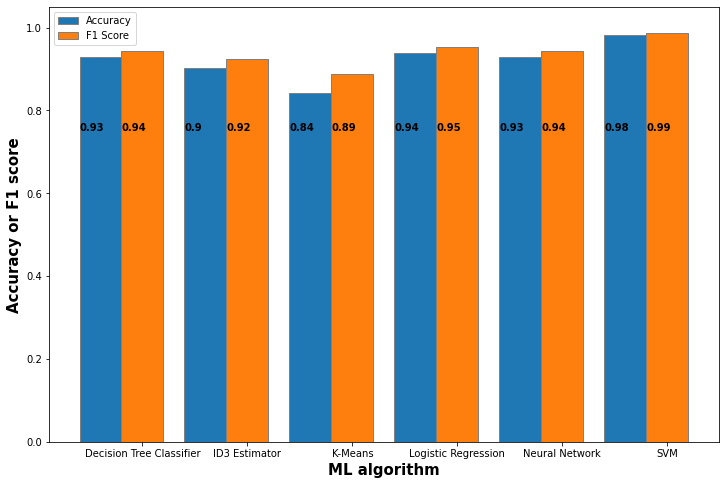

In [52]:
# set width of bar
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))
 
# set height of bar
data_accuracy = [
    tree_breast_cancer_results[0],
    id3_breast_cancer_results[0],
    kmeans_breast_cancer_results[0],
    log_regres_breast_cancer_results[0],
    nn_breast_cancer_results[0],
    svm_breast_cancer_results[0],
]
data_f1 = [
    tree_breast_cancer_results[1],
    id3_breast_cancer_results[1],
    kmeans_breast_cancer_results[1],
    log_regres_breast_cancer_results[1],
    nn_breast_cancer_results[1],
    svm_breast_cancer_results[1],
]
 
# Set position of bar on X axis
bar1 = np.arange(len(data_accuracy))
bar2 = [x + barWidth for x in bar1]
 
# Make the plot
plt.bar(bar1, data_accuracy, width=barWidth,
        edgecolor='grey', label='Accuracy')
plt.bar(bar2, data_f1, width=barWidth,
        edgecolor='grey', label='F1 Score')

for patch in ax.patches:
    plt.text(patch.get_x(), patch.get_y()+0.75,
             round(patch.get_height(), 2),
             fontsize = 10, fontweight ='bold')

# Adding Xticks
plt.xlabel('ML algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy or F1 score', fontweight ='bold', fontsize = 15)
plt.ylim(0, 1.05)
plt.xticks([r + barWidth for r in range(len(data_accuracy))],
        ['Decision Tree Classifier', 'ID3 Estimator', 'K-Means', 'Logistic Regression', 'Neural Network', 'SVM'])
 
plt.legend()
plt.show()

Dari grafik di atas, dapat dilihat bahwa algoritma-algoritma menghasilkan nilai yang relatif mirip. Dengan SVM yang menghasilkan nilai tertinggi, pada F1 99% dan akurasi 98%. Hasil yang relatif sama ini disebabkan oleh karena dataset _breast cancer_ yang berjumlah 455 untuk training dan 114 untuk tesnya sehingga algoritma mendapatkan data yang cukup.

Algoritma neural network yang digunakan adalah MLP Classifier dengan 3 layer.

Berikut adalah keseluruhan hasil untuk setiap algoritma:

1. Decision tree classifier: memberikan akurasi 93% dan F1 score 94%.
2. ID3 Estimator: memberikan akurasi 90% dan F1 score 92%. 
3. K-Means: Dari hasil evaluasi, didapatkan bahwa K-Means menghasilkan model dengan akurasi sebesar 84% dengan F1 scorenya 89%.
4. Logistic regression: Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 94% dengan F1 scorenya 95%.
5. Neural Network: menghasilkan akurasi sebesar 93% dan F1 score sebesar 94%.
6. SVM: Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 98% dengan F1 scorenya 99%.

## Play Tennis

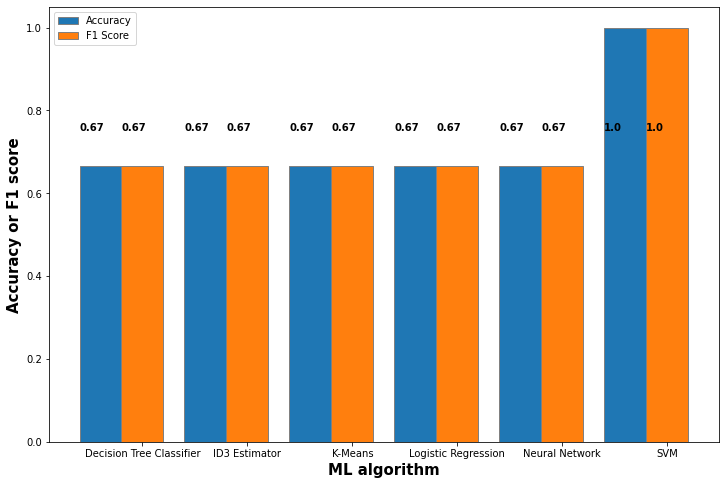

In [53]:
# set width of bar
barWidth = 0.4
fig, ax = plt.subplots(figsize =(12, 8))
 
# set height of bar
data_accuracy = [
    tree_play_tennis_results[0],
    id3_play_tennis_results[0],
    kmeans_play_tennis_results[0],
    log_regres_play_tennis_results[0],
    nn_play_tennis_results[0],
    svm_play_tennis_results[0],
]
data_f1 = [
    tree_play_tennis_results[1],
    id3_play_tennis_results[1],
    kmeans_play_tennis_results[1],
    log_regres_play_tennis_results[1],
    nn_play_tennis_results[1],
    svm_play_tennis_results[1],
]
 
# Set position of bar on X axis
bar1 = np.arange(len(data_accuracy))
bar2 = [x + barWidth for x in bar1]
 
# Make the plot
plt.bar(bar1, data_accuracy, width=barWidth,
        edgecolor='grey', label='Accuracy')
plt.bar(bar2, data_f1, width=barWidth,
        edgecolor='grey', label='F1 Score')

for patch in ax.patches:
    plt.text(patch.get_x(), patch.get_y()+0.75,
             round(patch.get_height(), 2),
             fontsize = 10, fontweight ='bold')

# Adding Xticks
plt.xlabel('ML algorithm', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy or F1 score', fontweight ='bold', fontsize = 15)
plt.ylim(0, 1.05)
plt.xticks([r + barWidth for r in range(len(data_accuracy))],
        ['Decision Tree Classifier', 'ID3 Estimator', 'K-Means', 'Logistic Regression', 'Neural Network', 'SVM'])
 
plt.legend()
plt.show()


Dataset _play tennis_ yang digunakan terdiri dari 11 training data dan 3 tes data.

Dari grafik di atas, dapat dilihat algoritma SVM memberikan hasil tertinggi, meskipun hal tersebut kemungkinan disebabkan karena terjadinya _overfitting_.

Perubahan parameter untuk algoritma K-Means dapat memberikan hasil yang signifikan. Dari sebelumnya 0% akurasi dan 0% F1, menjadi 67% akurasi dan 67% F1.

Secara rata-rata, akurasi yang dihasilkan adalah 67%, atau memiliki tingkat kebeneran 2 dari 3 data. Selain itu, skor F1 yang bernilai 67% juga berarti ketepatan dalam memprediksi label positif kurang baik.

Algoritma neural network yang digunakan adalah MLP Classifier dengan 3 layer.

Berikut adalah keseluruhan hasil untuk setiap algoritma:

1. Decision tree classifier: memberikan akurasi 67% dan F1 score 67% yang artinya memiliki tingkat kebenaran 2 dari 3 data.
2. ID3 Estimator: memberikan akurasi 67% dan F1 score 67% yang artinya memiliki tingkat kebenaran 2 dari 3 data. 
3. K-Means: Dari hasil evaluasi, didapatkan bahwa K-Means menghasilkan model dengan akurasi sebesar 67% dengan F1 scorenya 67%. Hal ini menandakan bahwa ketepatan model dalam memprediksi cukup buruk, model ini juga menghasilkan F1 yang bernilai setengah-setengah, yang berarti model ini memiliki kepercayaan yang kurang baik dalam memprediksi label positif.
4. Logistic regression: Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 67% dengan F1 scorenya 67%. Hal ini menandakan bahwa meskipun ketepatan model dalam memprediksi tidak begitu baik, model ini menghasilkan F1 yang jauh lebih baik, yang berarti model ini cukup baik dalam memprediksi label positif.
5. Neural Network: menghasilkan akurasi sebesar 67% dan F1 score sebesar 67% yang artinya memiliki tingkat kebenaran 2 dari 3 data.
6. SVM: Dari hasil evaluasi, didapatkan bahwa SVM menghasilkan model dengan akurasi sebesar 100% dengan F1 scorenya 100%. Meskipun menghasilkan nilai yang maksimal, hal ini menandakan adanya kemungkinan _overfitting_.